In [1]:
'''PROGRAM LOGIC
1. Convert to numberic representation scale 1-5 for Strongly Disagree - Strongly Agree
2. Seperate Large DF into smaller DFs based on demographic questions and atrribute values
3. Compare answers across groups using MANN-WHITNEY
4. Compare answerrs across groups using INFERENCE
'''


'PROGRAM LOGIC\n1. Seperate Large DF into smaller DFs based on demographic questions and atrribute values\n2. Convert to numberic representation scale 1-5 for Strongly Disagree - Strongly Agree\n3. Compare answers across groups using MANN-WHITNEY\n4. Compare answerrs across groups using INFERENCE\n'

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest


In [2]:
df = pd.read_csv('general_public.csv')

In [3]:
#Self-contained cell for converting data into numerical format
str2int_dict = {'Strongly Agree':5, 'Agree':4, 'Undecided': 3,'Disagree':2, 'Strongly Disagree':1}
def str2int(st):
    if ((type(st) == str) and (st.endswith('agree') or st.endswith('Agree') or st.endswith('decided'))):
        return str2int_dict[st]
    else:
        return st

for col in df.columns:
    df[col] = df[col].apply(str2int)

In [5]:
# Create an array of questions to analyze
# Reminder to add q0 later about frequency of watching the tremors
q1 = "I found the tremors to be distracting."
q2 = "I understood the content of the video."
q3 = "Removing the tremors from the video would help me understand the content better."
q4 = "I would like to have the option to remove the tremors from the video."
q5 = "The speaker should have the option to remove the tremors from the video."
q6 = "I perceive the speaker as competent"
q7 = "The speaker would appear more competent if the tremors were removed from the video"

q_list = [q1, q2, q3, q4, q5, q6, q7]


I found the tremors to be distracting.
I understood the content of the video.
Removing the tremors from the video would help me understand the content better.
I would like to have the option to remove the tremors from the video.
The speaker should have the option to remove the tremors from the video.
I perceive the speaker as competent
The speaker would appear more competent if the tremors were removed from the video


In [7]:
# begin with gender
g = df.groupby('What is your gender?')

df_male = df[(df['What is your gender?'] == 'Male')]
df_female = df[(df['What is your gender?'] == 'Female')]

I found the tremors to be distracting.
Male


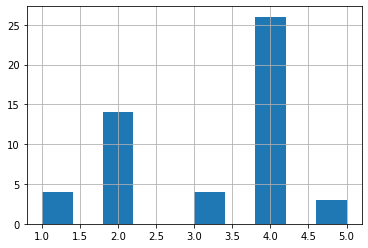

Female


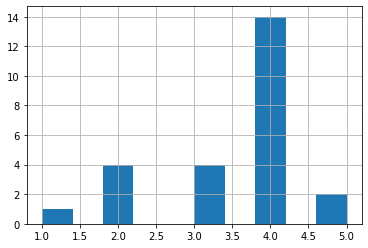

,count,mean,std,min,25%,50%,75%,max
What is your gender?,,,,,,,,
Female,25.0,3.480000,1.004988,1.0,3.0,4.0,4.0,5.0
Male,51.0,3.196078,1.149254,1.0,2.0,4.0,4.0,5.0


p-value =  0.24627146611304124
u-value=  0.9383967066516619


I understood the content of the video.
Male


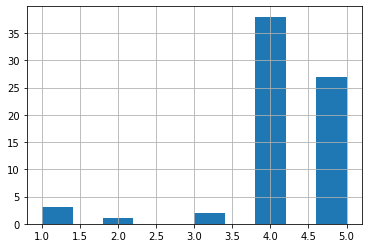

Female


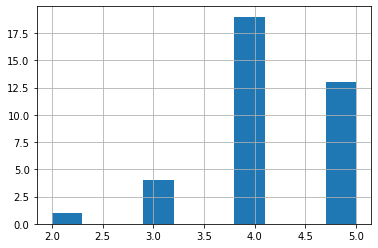

,count,mean,std,min,25%,50%,75%,max
What is your gender?,,,,,,,,
Female,37.0,4.189189,0.739288,2.0,4.0,4.0,5.0,5.0
Male,71.0,4.197183,0.904271,1.0,4.0,4.0,5.0,5.0


p-value =  0.31408396041892667
u-value=  0.9383967066516619


Removing the tremors from the video would help me understand the content better.
Male


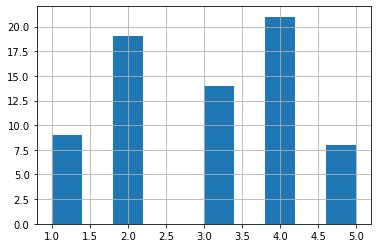

Female


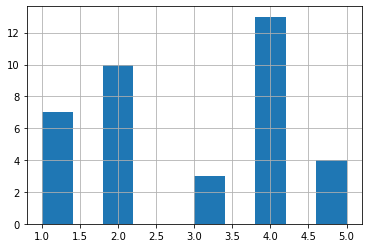

,count,mean,std,min,25%,50%,75%,max
What is your gender?,,,,,,,,
Female,37.0,2.918919,1.361747,1.0,2.0,3.0,4.0,5.0
Male,71.0,3.000000,1.242118,1.0,2.0,3.0,4.0,5.0


p-value =  0.39219086694729977
u-value=  0.9383967066516619


I would like to have the option to remove the tremors from the video.
Male


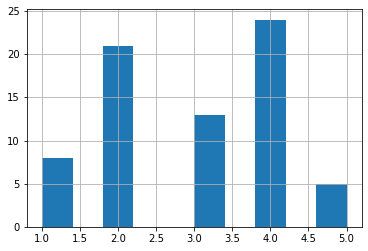

Female


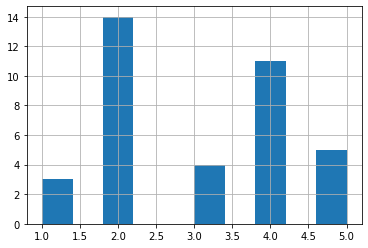

,count,mean,std,min,25%,50%,75%,max
What is your gender?,,,,,,,,
Female,37.0,3.027027,1.258007,1.0,2.0,3.0,4.0,5.0
Male,71.0,2.957746,1.176394,1.0,2.0,3.0,4.0,5.0


p-value =  0.4056355721699021
u-value=  0.9383967066516619


The speaker should have the option to remove the tremors from the video.
Male


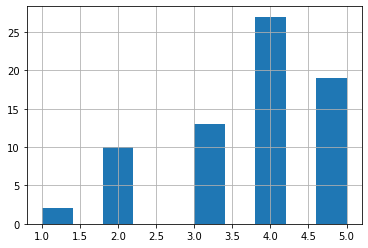

Female


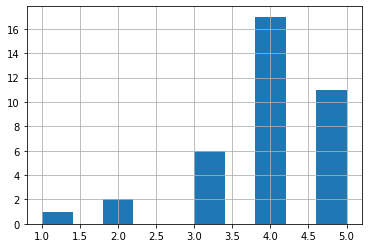

,count,mean,std,min,25%,50%,75%,max
What is your gender?,,,,,,,,
Female,37.0,3.945946,0.970279,1.0,4.0,4.0,5.0,5.0
Male,71.0,3.718310,1.097830,1.0,3.0,4.0,5.0,5.0


p-value =  0.16514186880697584
u-value=  0.9383967066516619


I perceive the speaker as competent
Male


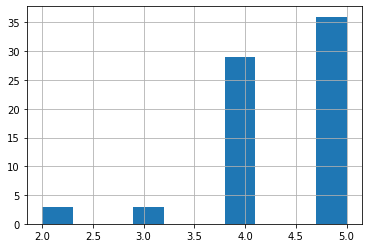

Female


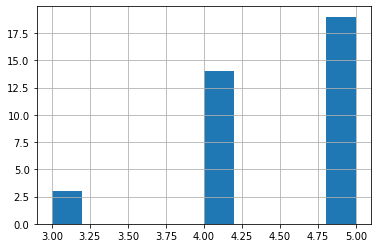

,count,mean,std,min,25%,50%,75%,max
What is your gender?,,,,,,,,
Female,36.0,4.444444,0.652225,3.0,4.0,5.0,5.0,5.0
Male,71.0,4.380282,0.762818,2.0,4.0,5.0,5.0,5.0


p-value =  0.32079666338650314
u-value=  0.9383967066516619


The speaker would appear more competent if the tremors were removed from the video
Male


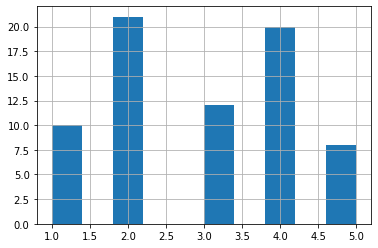

Female


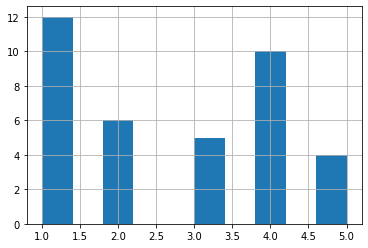

,count,mean,std,min,25%,50%,75%,max
What is your gender?,,,,,,,,
Female,37.0,2.675676,1.453999,1.0,1.0,3.0,4.0,5.0
Male,71.0,2.929577,1.268564,1.0,2.0,3.0,4.0,5.0


p-value =  0.16435766623566145
u-value=  0.9383967066516619




In [11]:
# Compute the Mann-Whitney rank test on samples x and y
# scipy.stats.mannwhitneyu(x, y, use_continuity=True, alternative=None)


for q in q_list:
    col_name = q
    print(col_name)
    print("Male")
    df_male[col_name].hist()
    plt.show()
    print("Female")
    df_female[col_name].hist()
    plt.show()
    display(g[col_name].describe())
    #Statistic test
    u,p = mannwhitneyu(df_male[col_name], df_female[col_name])
    print('p-value = ', p)
    print('u-value= ', t)
    print('\n========================================\n')

In [12]:
# This is to generate a table of distributions (counts) for each answer for each question
# 'Strongly Agree':5, 'Agree':4, 'Undecided': 3,'Disagree':2, 'Strongly Disagree':1
df_counts = pd.DataFrame()
for q in q_list:
    col_name = q
    df_counts[col_name] = df[col_name].value_counts() # applies function for every row in specified column
display(df_counts)

,I found the tremors to be distracting.,I understood the content of the video.,Removing the tremors from the video would help me understand the content better.,I would like to have the option to remove the tremors from the video.,The speaker should have the option to remove the tremors from the video.,I perceive the speaker as competent,The speaker would appear more competent if the tremors were removed from the video
4.0,40,57,34,35,44,43.0,30
2.0,18,2,29,35,12,3.0,27
3.0,8,6,17,17,19,6.0,17
5.0,5,40,12,10,30,55.0,12
1.0,5,3,16,11,3,NaN,22


In [16]:
# here we create a dataframe containing only disagree and agree sums
df_agree = df_counts.loc[[4, 5],:].sum()
df_disagree = df_counts.loc[[1,2],:].sum()
df_neutral = df_counts.loc[[3],:].sum()
df_AD = pd.concat([df_agree, df_disagree], axis=1)
df_AD.columns = ['Agree','Disagree']
print("Count for those who AGREED to the questions: ")
display(df_agree)
print("Count for those who DISAGREED to the questions: ")
display(df_disagree)
display(df_AD)


Count for those who AGREED to the questions: 


I found the tremors to be distracting.                                                45.0
I understood the content of the video.                                                97.0
Removing the tremors from the video would help me understand the content better.      46.0
I would like to have the option to remove the tremors from the video.                 45.0
The speaker should have the option to remove the tremors from the video.              74.0
I perceive the speaker as competent                                                   98.0
The speaker would appear more competent if the tremors were removed from the video    42.0
dtype: float64

Count for those who DISAGREED to the questions: 


I found the tremors to be distracting.                                                23.0
I understood the content of the video.                                                 5.0
Removing the tremors from the video would help me understand the content better.      45.0
I would like to have the option to remove the tremors from the video.                 46.0
The speaker should have the option to remove the tremors from the video.              15.0
I perceive the speaker as competent                                                    3.0
The speaker would appear more competent if the tremors were removed from the video    49.0
dtype: float64

,Agree,Disagree
I found the tremors to be distracting.,45.0,23.0
I understood the content of the video.,97.0,5.0
Removing the tremors from the video would help me understand the content better.,46.0,45.0
I would like to have the option to remove the tremors from the video.,45.0,46.0
The speaker should have the option to remove the tremors from the video.,74.0,15.0
I perceive the speaker as competent,98.0,3.0
The speaker would appear more competent if the tremors were removed from the video,42.0,49.0


In [19]:
#testing for population differences on all questions
# statsmodels.stats.proportion.proportions_ztest(count, nobs, value=None, 
#                   alternative='two-sided', prop_var=False)
# Returns statistic and p-value

for q in q_list:
    print(q)
    row_ID = q
    num_agree = df_AD.loc[row_ID,'Agree']
    num_disagree = df_AD.loc[row_ID,'Disagree']
    t, p = proportions_ztest(num_agree, (num_agree+num_disagree), value=.5) # Assume no difference 
    print("T: ", t, "P: ", p)
    print("\n==========================\n")





I found the tremors to be distracting.
T:  2.819531601898847 P:  0.0048093795063706615


I understood the content of the video.
T:  21.095365201619295 P:  8.772557379031369e-99


Removing the tremors from the video would help me understand the content better.
T:  0.10483481370351706 P:  0.9165068849059357


I would like to have the option to remove the tremors from the video.
T:  -0.10483481370351706 P:  0.9165068849059357


The speaker should have the option to remove the tremors from the video.
T:  8.353250972034889 P:  6.64093377370201e-17


I perceive the speaker as competent
T:  27.84073081865859 P:  1.394787538270669e-170


The speaker would appear more competent if the tremors were removed from the video
T:  -0.7359800721939868 P:  0.4617428253910867




In [14]:
for col in df.columns:
    print(col)

Timestamp
What is your age?
Where do you live?
What is your job/profession? (Please state if you are unemployed or retired.)
What is your gender?
Are you Hispanic, Latino/a, or Spanish origin? 
What is your race? (Check all that apply)
What is your education level?
How many people do you personally know with Parkinson’s Disease?
How often were you looking at the tremors?
I understood the content of the video.
Please summarize the content of the video in 1-2 sentences:
Removing the tremors from the video would help me understand the content better.
I would like to have the option to remove the tremors from the video.
The speaker should have the option to remove the tremors from the video.
I perceive the speaker as competent
The speaker would appear more competent if the tremors were removed from the video
I would find it useful to have a filter that could change my race in videos.
In which scenarios would you find a racial filter useful? (please check all that apply)
If you checked the 